#### This is another Kaggle competition to test our skill of Regression techniques.

#### I am sharing my way of solving this problem :)

#### Import the libraries.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

#### Read the datasets.

In [106]:
train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_data  = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [107]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Analyse the datasets.

In [108]:
train_data.shape

(1460, 81)

In [109]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [110]:
test_data.shape

(1459, 80)

In [111]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

#### So we can see there are 81 columns with different data types and some of them contain missing values which we need to impute and the variable to predict is SalePrice.

#### Let's analyse the 'SalePrice' variable from train dataset.

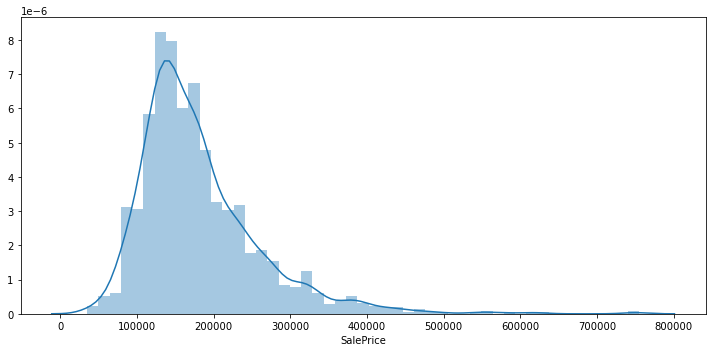

In [112]:
fig = plt.figure(figsize=(10,5))
sns.distplot(train_data['SalePrice'])
plt.tight_layout()
plt.show()

#### We can see the data is skewed to the right i .e positively skewed which is eveident from the Quantile-Quantile plot as displayed below.

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

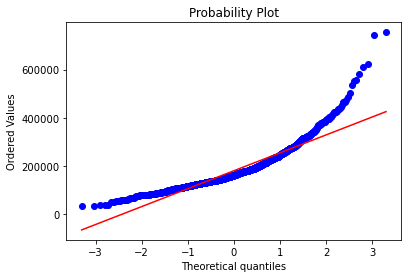

In [113]:
from scipy import stats
stats.probplot(train_data['SalePrice'], plot=plt)

#### Another important observation is 2 outliers at the top-right corner which we need to take care.

#### To minimise the skewness we will apply log transformation.

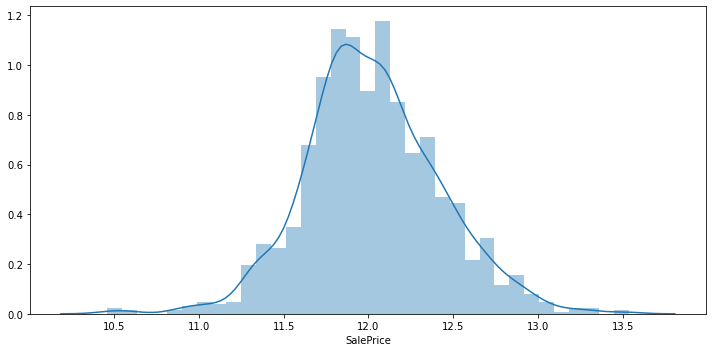

In [114]:
fig = plt.figure(figsize=(10,5))
sns.distplot(np.log1p(train_data['SalePrice']))
plt.tight_layout()
plt.show()

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3982596466541509, 12.024057394918403, 0.9953761551826702))

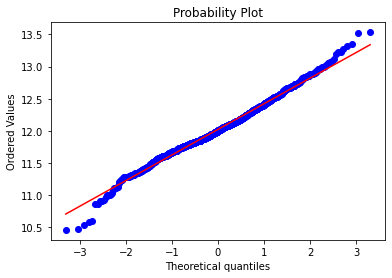

In [115]:
stats.probplot(np.log1p(train_data['SalePrice']), plot=plt)

#### From this visualizations we can infer the log transformation makes the data symmetrical.

#### Since the datasets have mixed data we need to separate them out into multiple groups so that we can apply different imputation and transformation strategies.

In [116]:
cat_data = train_data.select_dtypes(include='object')
cat_cols = cat_data.columns

num_data = train_data.select_dtypes(exclude='object')
num_cols = num_data.columns

num_to_cat_cols = ['MSSubClass', 'MoSold', 'YrSold', 'OverallQual', 'OverallCond']

num_cols = [i for i in num_cols if not i in num_to_cat_cols]
num_cols = [i for i in num_cols if not i in ['Id']]

num_data = num_data.drop(['Id', 'MSSubClass', 'MoSold', 'YrSold', 'OverallQual', 'OverallCond'], axis=1)

print("There are %d Num , %d Cat, %d Num-Cat columns." % (len(num_cols), len(cat_cols), len(num_to_cat_cols)))

There are 32 Num , 43 Cat, 5 Num-Cat columns.


#### Let's see the frequency of values of each categorical variable.

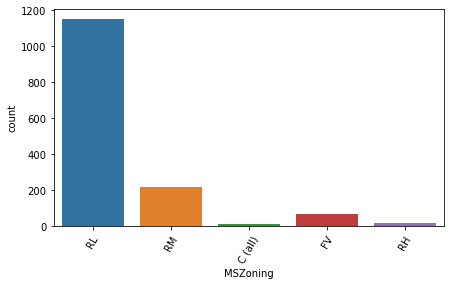

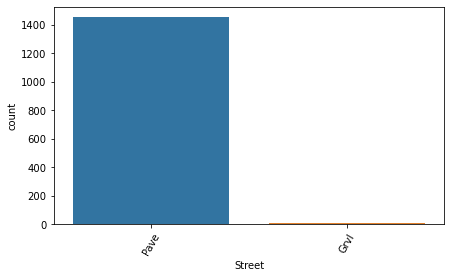

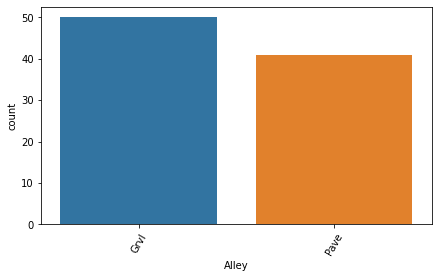

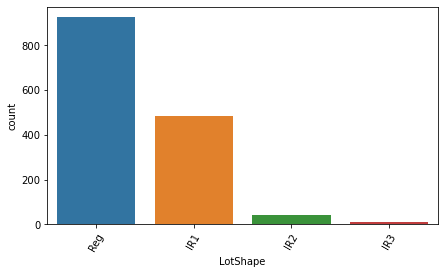

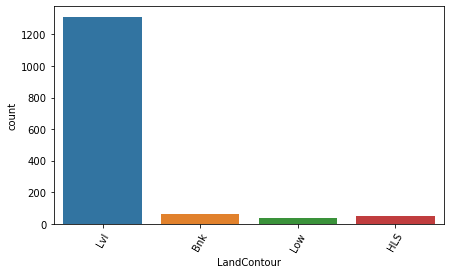

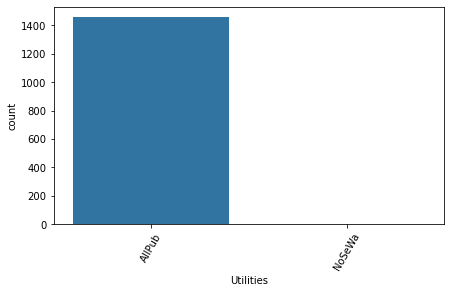

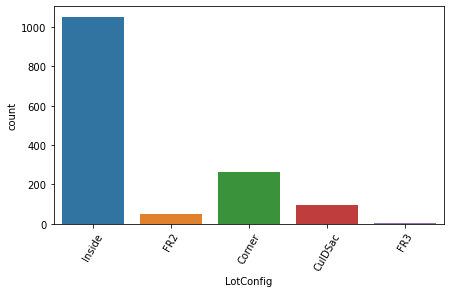

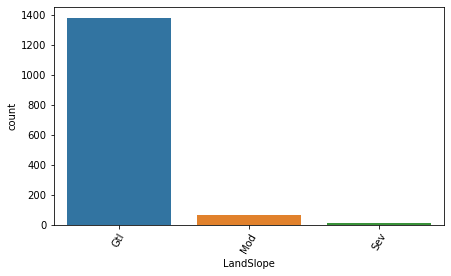

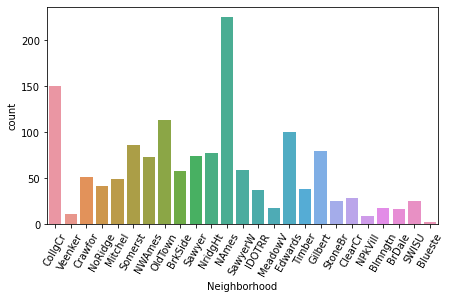

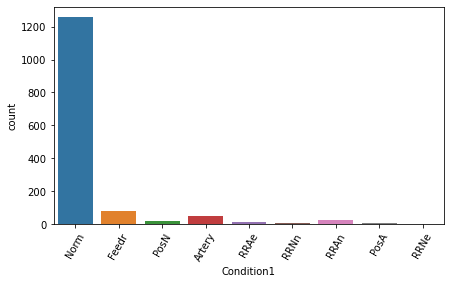

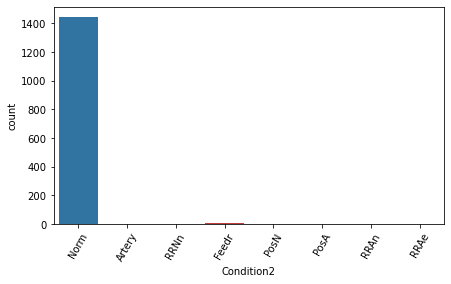

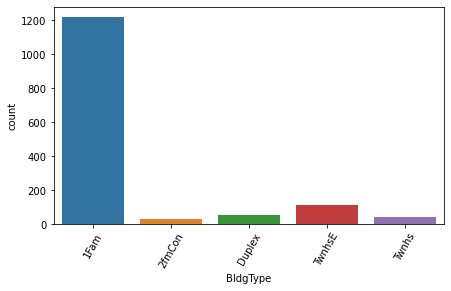

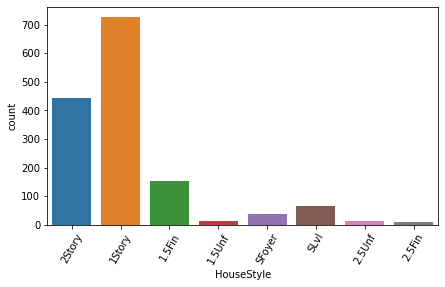

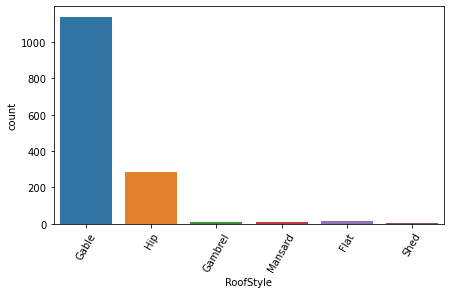

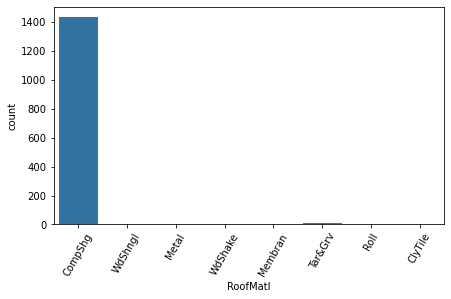

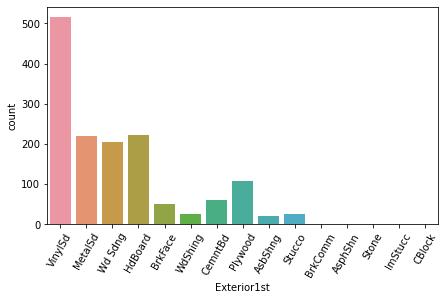

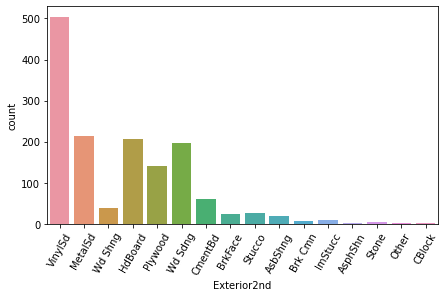

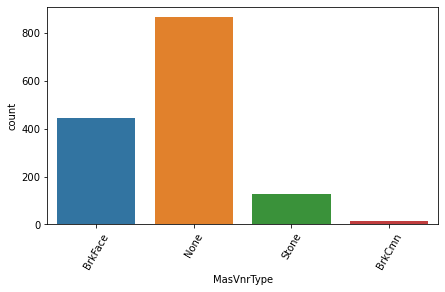

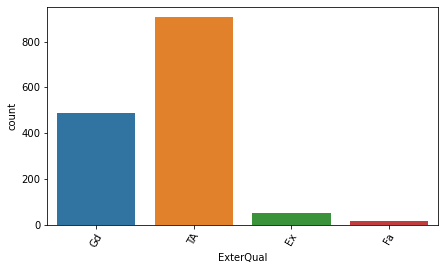

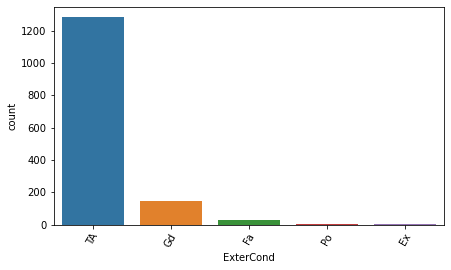

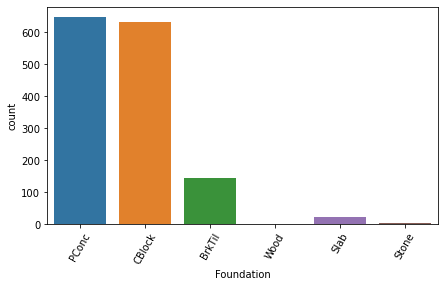

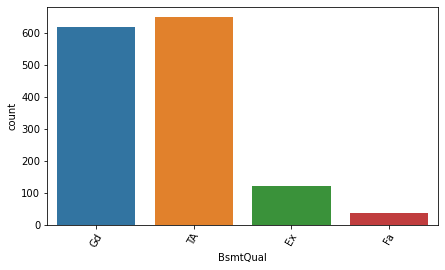

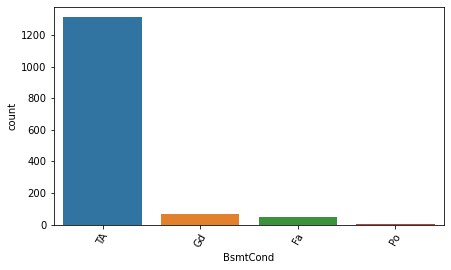

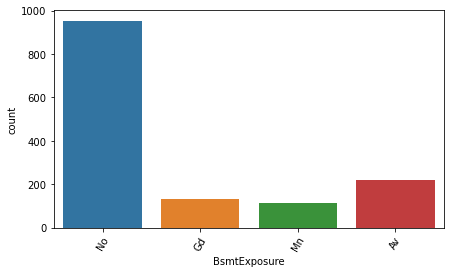

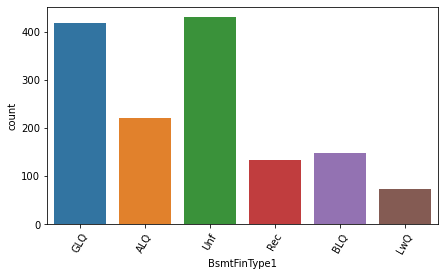

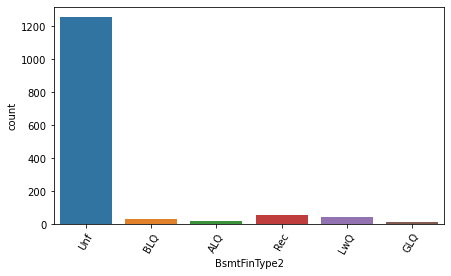

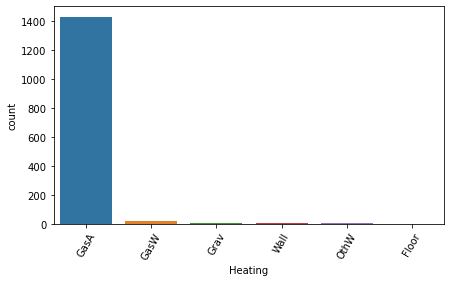

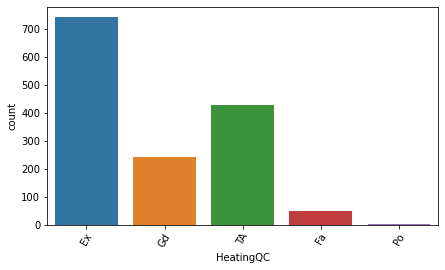

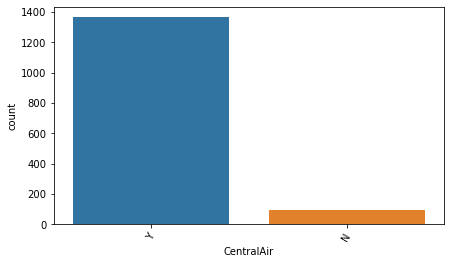

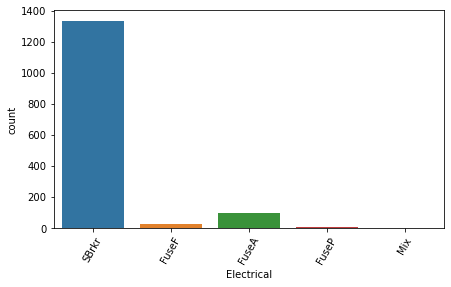

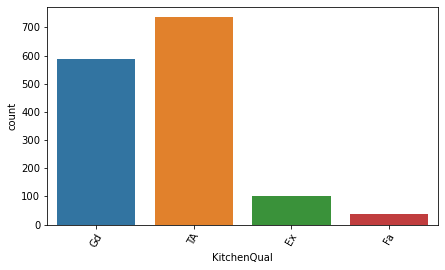

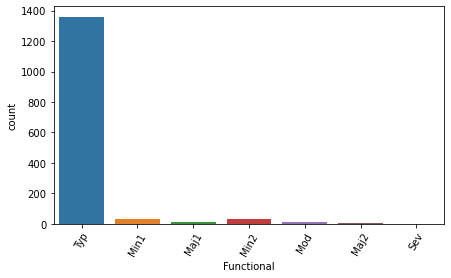

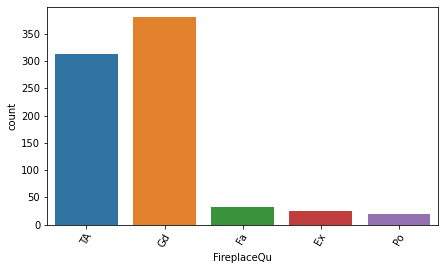

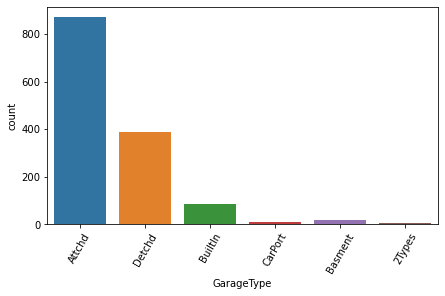

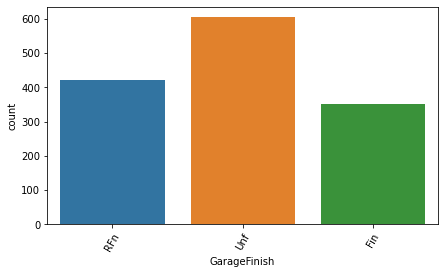

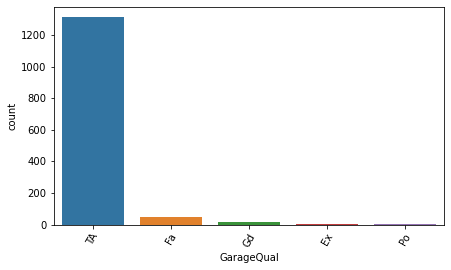

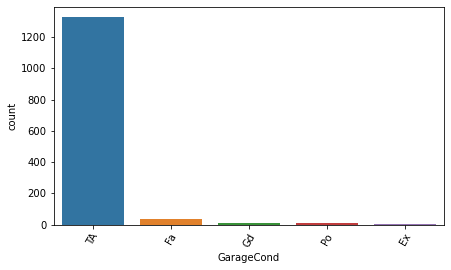

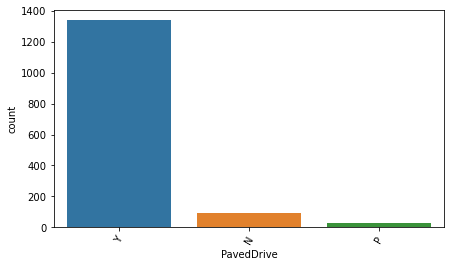

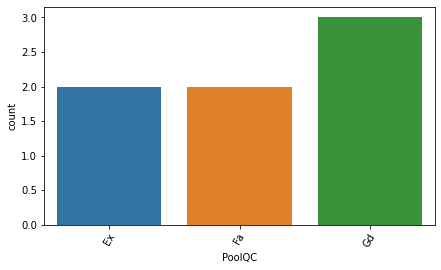

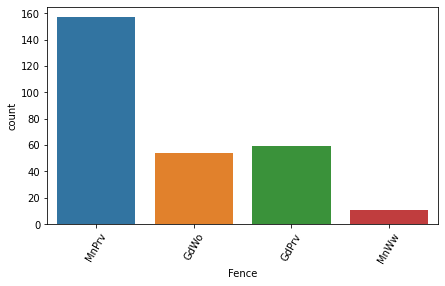

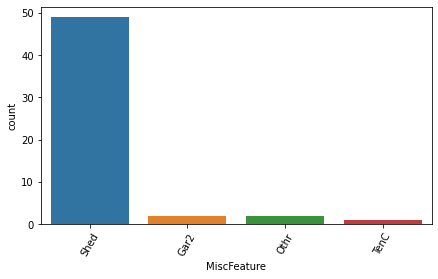

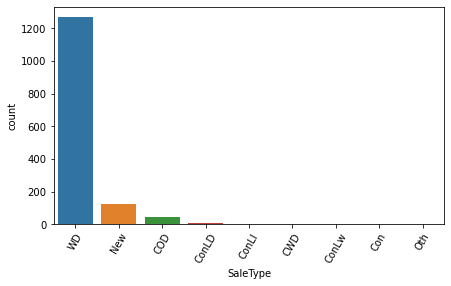

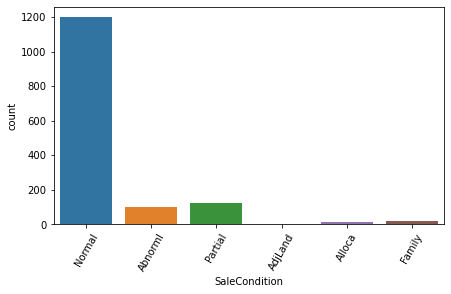

In [117]:
for i in range(len(cat_data.columns)):
    f, ax = plt.subplots(figsize=(7, 4))
    fig = sns.countplot(cat_data.iloc[:,i].dropna())
    plt.xlabel(cat_data.columns[i])
    plt.xticks(rotation=60)

#### Since in each categorical variable the value of majority class is high compared to other class we will impute the missing values with most frequent class in each variablebut for some cases we will impute them as per the default value in field description.

#### Univariate analysis of numeric columns which will give us a hint about their distribution.

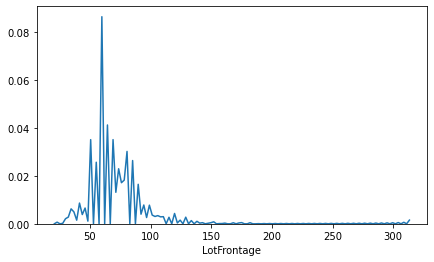

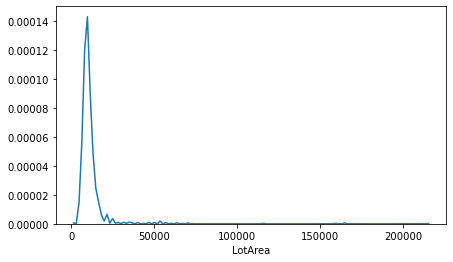

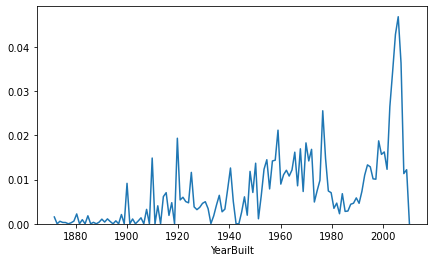

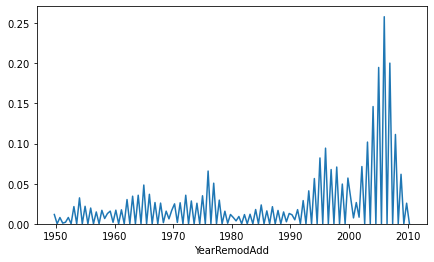

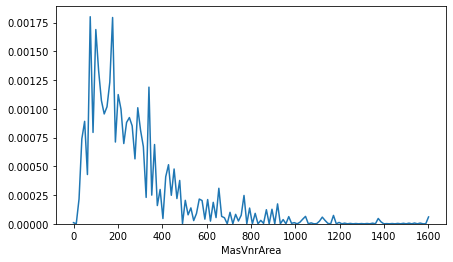

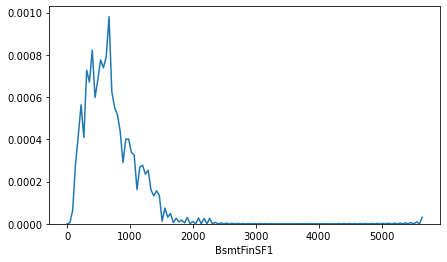

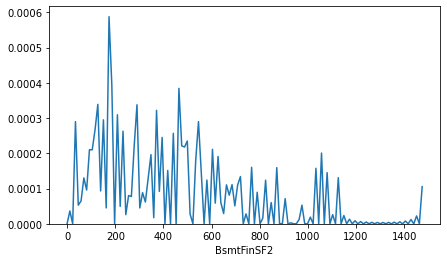

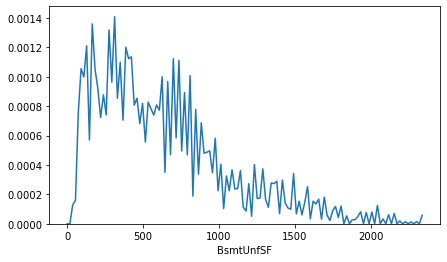

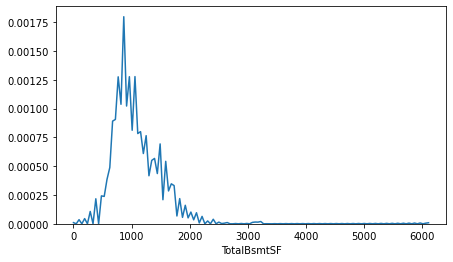

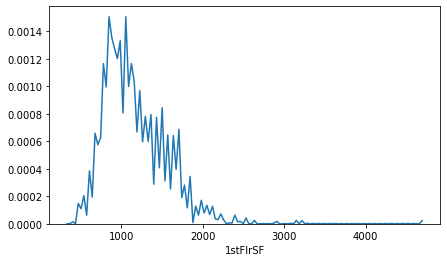

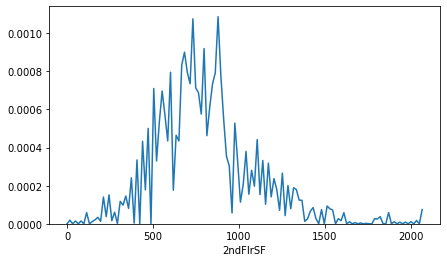

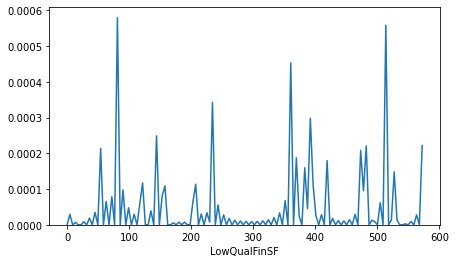

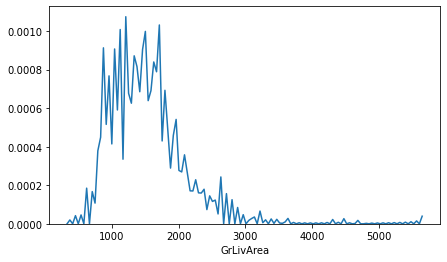

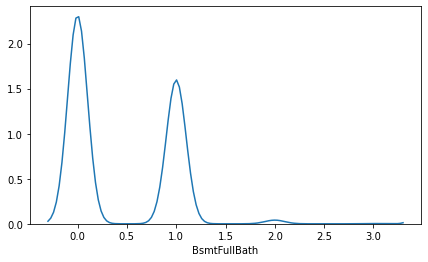

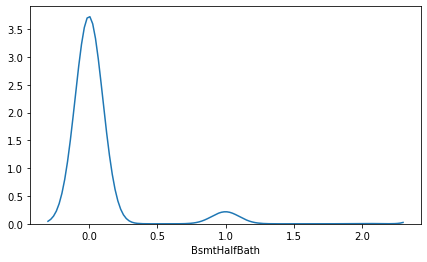

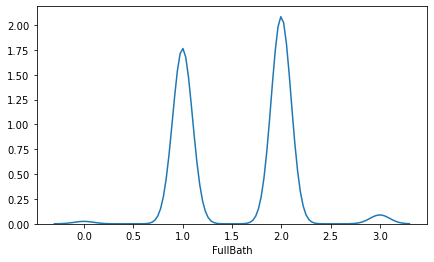

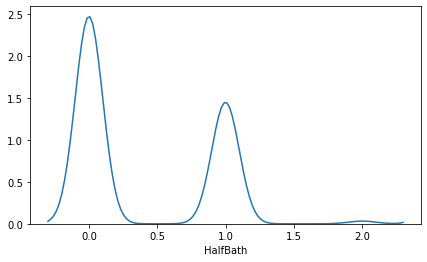

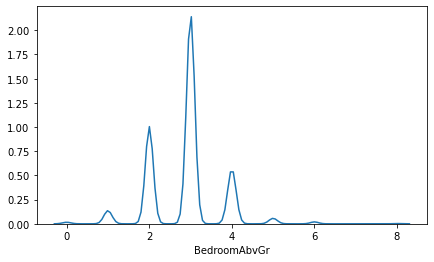

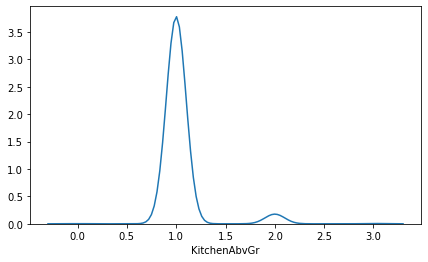

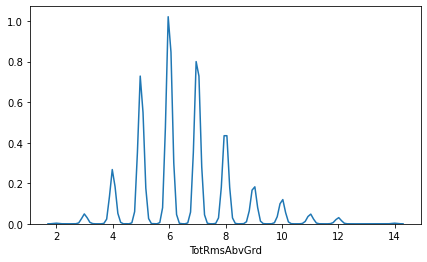

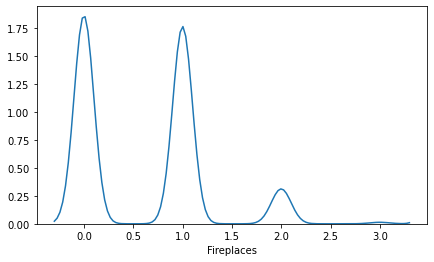

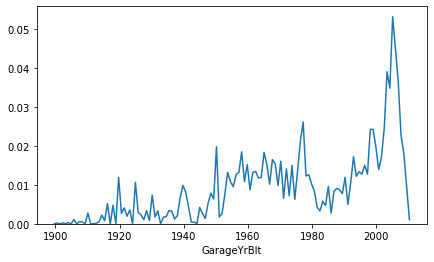

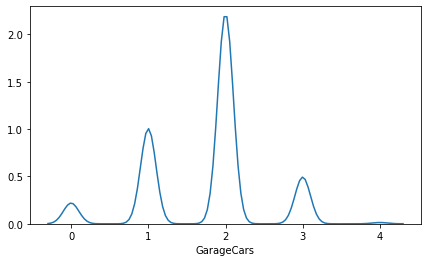

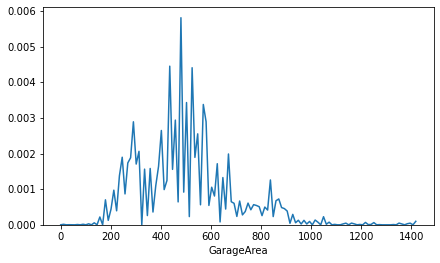

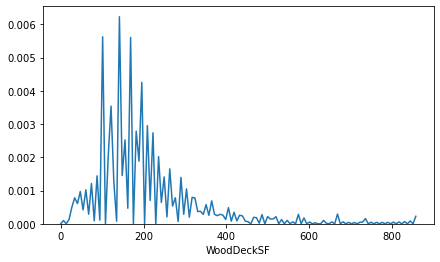

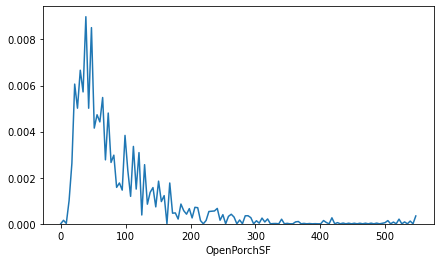

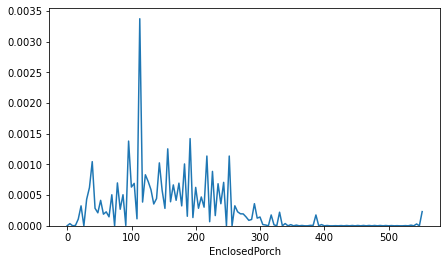

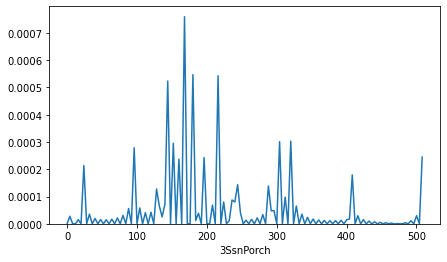

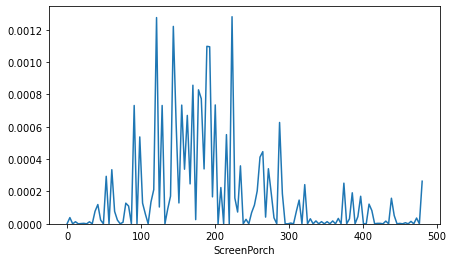

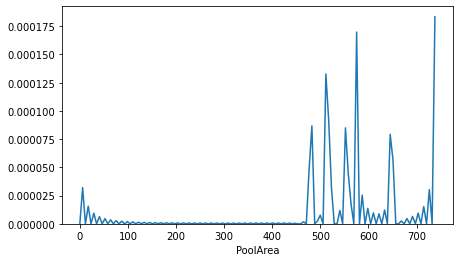

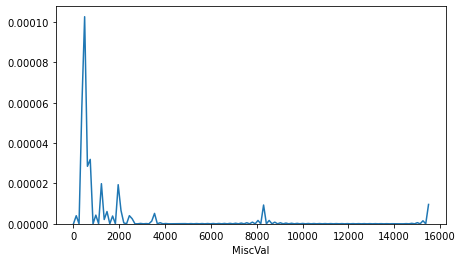

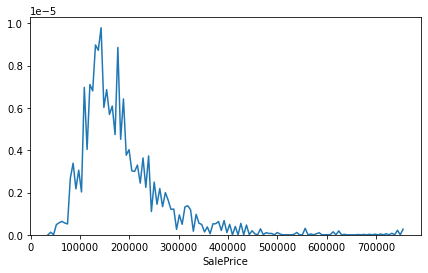

In [118]:
for i in range(len(num_data.columns)):
    f, ax = plt.subplots(figsize=(7, 4))
    fig = sns.distplot(num_data.iloc[:,i].dropna(), rug=False, hist=False, kde_kws={'bw':0.1})
    plt.xlabel(num_data.columns[i])

In [119]:
skew_dict = {}
for cols in num_cols:
    skew_dict[cols] = {'Skewness': train_data[cols].skew()}
    
skew_df = pd.DataFrame(skew_dict).transpose()
skew_df.columns = ['Skewness']
skew_df.sort_values(by=['Skewness'], ascending=False)

,Skewness
MiscVal,24.476794
PoolArea,14.828374
LotArea,12.207688
3SsnPorch,10.304342
LowQualFinSF,9.011341
KitchenAbvGr,4.488397
BsmtFinSF2,4.255261
ScreenPorch,4.122214
BsmtHalfBath,4.103403
EnclosedPorch,3.089872


#### We can see the distribution is not symmetric so we need to transform the data to smooth.

#### Let's see the correlation of numerical columns with SalePrice (Bi-variate Analysis).

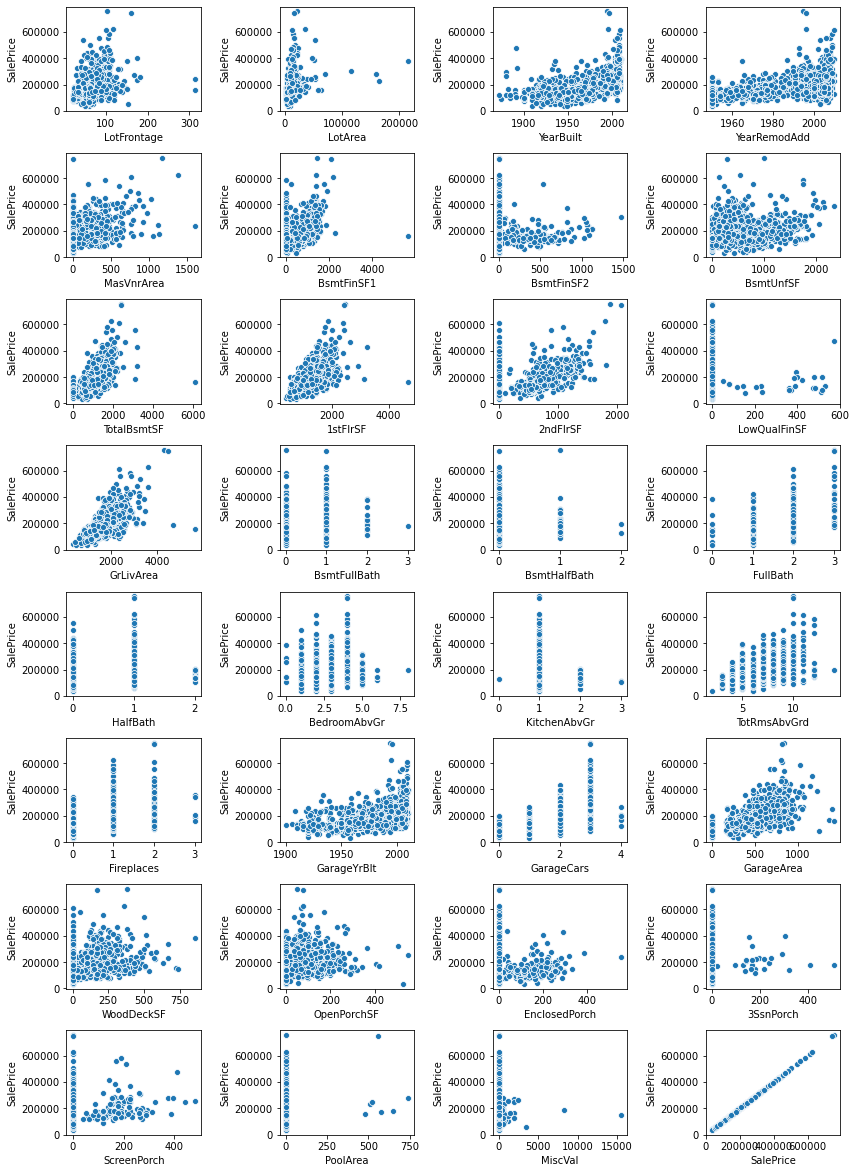

In [120]:
fig = plt.figure(figsize=(12,18))
for i in range(len(num_data.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(num_data.iloc[:, i], num_data['SalePrice'])
plt.tight_layout()
plt.show()

#### We can see the co-relation co-efficients as well.

In [121]:
corr_matrix = train_data[num_cols].corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

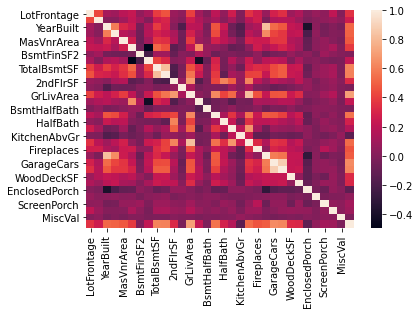

In [122]:
sns.heatmap(corr_matrix)

#### Outlier identification.

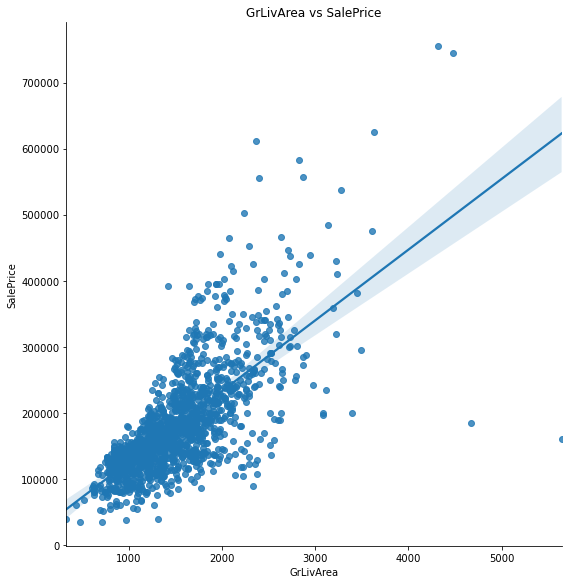

In [123]:
sns.lmplot('GrLivArea', 'SalePrice', data=train_data, height=8)
plt.title("GrLivArea vs SalePrice")
plt.show()

#### So there are 2 rows where GrLivArea is more than 4000 but prices are less than 200,000.
#### Let's see their Id.

In [124]:
train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [125]:
train_data = train_data.drop(train_data[train_data['Id'] == 524].index)
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)

#### Missing value imputation.

In [126]:
from sklearn.impute import SimpleImputer

mean_imputer    = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
freq_imputer_MSZ    = SimpleImputer(strategy='most_frequent')
freq_imputer_UTI    = SimpleImputer(strategy='most_frequent')
freq_imputer_EXT1    = SimpleImputer(strategy='most_frequent')
freq_imputer_EXT2    = SimpleImputer(strategy='most_frequent')
freq_imputer_ELE    = SimpleImputer(strategy='most_frequent')
freq_imputer_KIT    = SimpleImputer(strategy='most_frequent')
freq_imputer_FUN    = SimpleImputer(strategy='most_frequent')
freq_imputer_SAL    = SimpleImputer(strategy='most_frequent')

train_data['MSZoning'] = freq_imputer_MSZ.fit_transform(train_data[['MSZoning']])
train_data['Alley']    = train_data['Alley'].fillna('No alley access')
train_data['Utilities']    = freq_imputer_UTI.fit_transform(train_data[['Utilities']])
train_data['Exterior1st']    = freq_imputer_EXT1.fit_transform(train_data[['Exterior1st']])
train_data['Exterior2nd']    = freq_imputer_EXT2.fit_transform(train_data[['Exterior2nd']])
train_data['MasVnrType']    = train_data['MasVnrType'].fillna('None')
train_data['BsmtQual']    = train_data['BsmtQual'].fillna('No Basement')
train_data['BsmtCond']    = train_data['BsmtCond'].fillna('No Basement')
train_data['BsmtExposure']    = train_data['BsmtExposure'].fillna('No Basement')
train_data['BsmtFinType1']    = train_data['BsmtFinType1'].fillna('No Basement')
train_data['BsmtFinType2']    = train_data['BsmtFinType2'].fillna('No Basement')
train_data['Electrical']    = freq_imputer_ELE.fit_transform(train_data[['Electrical']])
train_data['KitchenQual']    = freq_imputer_KIT.fit_transform(train_data[['KitchenQual']])
train_data['Functional']    = freq_imputer_FUN.fit_transform(train_data[['Functional']])
train_data['FireplaceQu']    = train_data['FireplaceQu'].fillna('No Fireplace')
train_data['GarageType']    = train_data['GarageType'].fillna('No Garage')
train_data['GarageYrBlt']    = train_data['GarageYrBlt'].fillna(train_data['YearBuilt'])
train_data['GarageFinish']    = train_data['GarageFinish'].fillna('No Garage')
train_data['GarageQual']    = train_data['GarageQual'].fillna('No Garage')
train_data['GarageCond']    = train_data['GarageCond'].fillna('No Garage')
train_data['PoolQC']    = train_data['PoolQC'].fillna('No Pool')
train_data['Fence']    = train_data['Fence'].fillna('No Fence')
train_data['MiscFeature']    = train_data['MiscFeature'].fillna('None')
train_data['SaleType']    = freq_imputer_SAL.fit_transform(train_data[['SaleType']])

train_data['LotFrontage']    = median_imputer.fit_transform(train_data[['LotFrontage']])
train_data['MasVnrArea']    = train_data['MasVnrArea'].fillna(0)
train_data['BsmtFinSF1']    = train_data['BsmtFinSF1'].fillna(0)
train_data['BsmtFinSF2']    = train_data['BsmtFinSF2'].fillna(0)
train_data['BsmtUnfSF']    = train_data['BsmtUnfSF'].fillna(0)
train_data['TotalBsmtSF']    = train_data['TotalBsmtSF'].fillna(0)
train_data['BsmtFullBath']    = train_data['BsmtFullBath'].fillna(0)
train_data['BsmtHalfBath']    = train_data['BsmtHalfBath'].fillna(0)
train_data['GarageCars']    = train_data['GarageCars'].fillna(0)
train_data['GarageArea']    = train_data['GarageArea'].fillna(0)

train_data[num_to_cat_cols] = train_data[num_to_cat_cols].astype(str)

In [127]:
#Missing value imputation (test_data)
test_data['MSZoning'] = freq_imputer_MSZ.transform(test_data[['MSZoning']])
test_data['Alley']    = test_data['Alley'].fillna('No alley access')
test_data['Utilities']    = freq_imputer_UTI.transform(test_data[['Utilities']])
test_data['Exterior1st']    = freq_imputer_EXT1.transform(test_data[['Exterior1st']])
test_data['Exterior2nd']    = freq_imputer_EXT2.transform(test_data[['Exterior2nd']])
test_data['MasVnrType']    = test_data['MasVnrType'].fillna('None')
test_data['BsmtQual']    = test_data['BsmtQual'].fillna('No Basement')
test_data['BsmtCond']    = test_data['BsmtCond'].fillna('No Basement')
test_data['BsmtExposure']    = test_data['BsmtExposure'].fillna('No Basement')
test_data['BsmtFinType1']    = test_data['BsmtFinType1'].fillna('No Basement')
test_data['BsmtFinType2']    = test_data['BsmtFinType2'].fillna('No Basement')
test_data['Electrical']    = freq_imputer_ELE.transform(test_data[['Electrical']])
test_data['KitchenQual']    = freq_imputer_KIT.transform(test_data[['KitchenQual']])
test_data['Functional']    = freq_imputer_FUN.transform(test_data[['Functional']])
test_data['FireplaceQu']    = test_data['FireplaceQu'].fillna('No Fireplace')
test_data['GarageType']    = test_data['GarageType'].fillna('No Garage')
test_data['GarageYrBlt']    = test_data['GarageYrBlt'].fillna(test_data['YearBuilt'])
test_data['GarageFinish']    = test_data['GarageFinish'].fillna('No Garage')
test_data['GarageQual']    = test_data['GarageQual'].fillna('No Garage')
test_data['GarageCond']    = test_data['GarageCond'].fillna('No Garage')
test_data['PoolQC']    = test_data['PoolQC'].fillna('No Pool')
test_data['Fence']    = test_data['Fence'].fillna('No Fence')
test_data['MiscFeature']    = test_data['MiscFeature'].fillna('None')
test_data['SaleType']    = freq_imputer_SAL.transform(test_data[['SaleType']])

test_data['LotFrontage']    = median_imputer.transform(test_data[['LotFrontage']])
test_data['MasVnrArea']    = test_data['MasVnrArea'].fillna(0)
test_data['BsmtFinSF1']    = test_data['BsmtFinSF1'].fillna(0)
test_data['BsmtFinSF2']    = test_data['BsmtFinSF2'].fillna(0)
test_data['BsmtUnfSF']    = test_data['BsmtUnfSF'].fillna(0)
test_data['TotalBsmtSF']    = test_data['TotalBsmtSF'].fillna(0)
test_data['BsmtFullBath']    = test_data['BsmtFullBath'].fillna(0)
test_data['BsmtHalfBath']    = test_data['BsmtHalfBath'].fillna(0)
test_data['GarageCars']    = test_data['GarageCars'].fillna(0)
test_data['GarageArea']    = test_data['GarageArea'].fillna(0)

test_data[num_to_cat_cols] = test_data[num_to_cat_cols].astype(str)

#### Feature engineering - we will create:

1. Total Bathroom
2. Total SF
3. Total Porch

In [128]:
train_data['Total_Bathroom'] = train_data['BsmtFullBath'] + 0.5 * train_data['BsmtHalfBath'] + \
                               train_data['FullBath'] + 0.5 * train_data['HalfBath']
    
train_data['Total_SF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + \
                         train_data['2ndFlrSF'] + train_data['GrLivArea']
    
train_data['Total_Porch'] = train_data['OpenPorchSF'] + train_data['EnclosedPorch'] + \
                            train_data['3SsnPorch'] + train_data['ScreenPorch']

In [129]:
test_data['SalePrice'] = 0
test_data['Total_Bathroom'] = test_data['BsmtFullBath'] + 0.5 * test_data['BsmtHalfBath'] + \
                              test_data['FullBath'] + 0.5 * test_data['HalfBath']
    
test_data['Total_SF'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + \
                        test_data['2ndFlrSF'] + test_data['GrLivArea']
    
test_data['Total_Porch'] = test_data['OpenPorchSF'] + test_data['EnclosedPorch'] + \
                           test_data['3SsnPorch'] + test_data['ScreenPorch']

In [130]:
add_num_cols = ['Total_Bathroom', 'Total_SF', 'Total_Porch']
num_cols.extend(add_num_cols)

#### For categorical variables we will create dummy variables so we need to merge train and test data to ensure that none of the category is left out; otherwise the model will fail.

In [132]:
model_data = pd.concat([train_data, test_data], axis=0, sort=None, ignore_index=True)

In [133]:
model_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_Bathroom,Total_SF,Total_Porch
2912,2915,160,RM,21.0,1936,Pave,No alley access,Reg,Lvl,AllPub,...,None,0,6,2006,WD,Normal,0,1.5,2730.0,0
2913,2916,160,RM,21.0,1894,Pave,No alley access,Reg,Lvl,AllPub,...,None,0,4,2006,WD,Abnorml,0,1.5,2730.0,24
2914,2917,20,RL,160.0,20000,Pave,No alley access,Reg,Lvl,AllPub,...,None,0,9,2006,WD,Abnorml,0,2.0,3672.0,0
2915,2918,85,RL,62.0,10441,Pave,No alley access,Reg,Lvl,AllPub,...,Shed,700,7,2006,WD,Normal,0,1.5,2852.0,32
2916,2919,60,RL,74.0,9627,Pave,No alley access,Reg,Lvl,AllPub,...,None,0,11,2006,WD,Normal,0,2.5,4996.0,48


#### Create Age of the house variable.

In [134]:
model_data['Age'] = model_data['YearRemodAdd'] - model_data['YearBuilt']
num_cols.extend(['Age'])

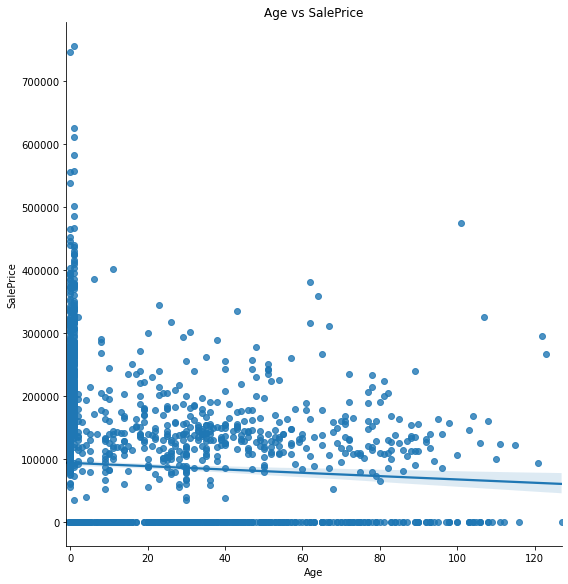

In [135]:
sns.lmplot('Age', 'SalePrice', data=model_data, height=8)
plt.title("Age vs SalePrice")
plt.show()

#### Create some boolean variable.

In [136]:
model_data['HasPorch'] = model_data['Total_Porch'].apply(lambda x: 1 if x > 0 else 0)
model_data['HasGarage'] = model_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
model_data['HasPool'] = model_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
model_data['WasRemodeled'] = (model_data['YearRemodAdd'] != model_data['YearBuilt']).astype(np.int64)
model_data['IsNew'] = (model_data['YearBuilt'] > 2000).astype(np.int64)
model_data['IsComplete'] = (model_data['SaleCondition'] != 'Partial').astype(np.int64)

In [137]:
model_data.shape

(2917, 91)

#### Apply LabelEncoder to categorical features.

In [138]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(model_data[c].values)) 
    model_data[c] = lbl.transform(list(model_data[c].values))

#### Smooth the numerical data - apply BoxCox transformation.

In [139]:
numeric_feats = model_data.dtypes[model_data.dtypes != "object"].index
numeric_feats = [elem for elem in numeric_feats if elem not in ('Id', 'SalePrice')]

from scipy.special import boxcox1p

lam = 0.15
for feat in numeric_feats:
    model_data[feat] = boxcox1p(model_data[feat], lam)

In [140]:
model_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Total_Bathroom,Total_SF,Total_Porch,Age,HasPorch,HasGarage,HasPool,WasRemodeled,IsNew,IsComplete
0,1,2.885846,RL,5.831328,19.212182,0.730463,0.730463,1.540963,Lvl,AllPub,...,1.687259,16.699078,5.714669,0.000000,0.730463,0.730463,0.0,0.000000,0.730463,0.730463
1,2,2.055642,RL,6.221214,19.712205,0.730463,0.730463,1.540963,Lvl,AllPub,...,1.378202,16.276483,0.000000,0.000000,0.000000,0.730463,0.0,0.000000,0.000000,0.730463
2,3,2.885846,RL,5.914940,20.347241,0.730463,0.730463,0.000000,Lvl,AllPub,...,1.687259,16.872398,5.053371,0.730463,0.730463,0.730463,0.0,0.730463,0.730463,0.730463
3,4,3.011340,RL,5.684507,19.691553,0.730463,0.730463,0.000000,Lvl,AllPub,...,1.194318,16.627994,9.080098,5.527074,0.730463,0.730463,0.0,0.730463,0.000000,0.730463
4,5,2.885846,RL,6.314735,21.325160,0.730463,0.730463,0.000000,Lvl,AllPub,...,1.687259,17.625079,6.314735,0.000000,0.730463,0.730463,0.0,0.000000,0.000000,0.730463


#### We are creating dummy variables; so we are removing 'Id' otherwise we will get dummy varibles created for 'Id' which we don't want.

In [141]:
model_data_new = model_data.copy()
model_data_new = model_data_new.drop(['Id'], axis=1)

model_data_new = pd.get_dummies(model_data_new)
model_data_updated = pd.concat([model_data['Id'], model_data_new], axis=1)

model_data_updated.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,1.820334,14.187527,...,0,0,0,1,0,0,0,0,1,0
1,2,2.055642,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.440268,14.145138,...,0,0,0,1,0,0,0,0,1,0
2,3,2.885846,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,1.820334,14.184404,...,0,0,0,1,0,0,0,0,1,0
3,4,3.011340,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,1.820334,14.047529,...,0,0,0,1,1,0,0,0,0,0
4,5,2.885846,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,1.820334,14.182841,...,0,0,0,1,0,0,0,0,1,0


#### Split train-test data as per their 'Id' in the original dataset.

In [142]:
model_train_data = model_data_updated[model_data_updated.Id < 1461]
model_test_data  = model_data_updated[model_data_updated.Id > 1460]
print("Train Data Shape: ", model_train_data.shape)
print("Test Data Shape : ", model_test_data.shape)

Train Data Shape:  (1458, 242)
Test Data Shape :  (1459, 242)


In [143]:
model_label_data = pd.DataFrame(model_train_data['SalePrice'])
model_label_data.columns=['SalePrice']
model_train_data = model_train_data.drop(['Id', 'SalePrice'], axis=1)
model_test_data  = model_test_data.drop(['Id', 'SalePrice'], axis=1)
print("Train Data Shape: ", model_train_data.shape)
print("Test Data Shape : ", model_test_data.shape)

Train Data Shape:  (1458, 240)
Test Data Shape :  (1459, 240)


#### Scale numerical data.

In [144]:
from sklearn.preprocessing import RobustScaler

std_scaler = RobustScaler()

model_train_data[numeric_feats] = std_scaler.fit_transform(model_train_data[numeric_feats])
model_test_data[numeric_feats]  = std_scaler.transform(model_test_data[numeric_feats])

#### Log transform 'SalePrice'.

In [145]:
model_label_data['SalePrice'] = np.log(model_label_data['SalePrice'])

#### So we have prepared the data for the model and we will start applying it.

#### LASSO.

In [148]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lasso_model = Lasso(alpha=0.0005, max_iter=30000, random_state=42)
score = cross_val_score(lasso_model, model_train_data, model_label_data, scoring='neg_mean_squared_error', cv=10)
scores_lasso = np.sqrt(-score).mean()
print("LASSO RMSE: ", scores_lasso)
print("LASSO STD : ", np.sqrt(-score).std())

LASSO RMSE:  0.10837743067112486
LASSO STD :  0.014629508738986722


In [186]:
lasso_model.fit(model_train_data, model_label_data)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=30000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Ridge.

In [149]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.0005, max_iter=30000, random_state=42)
score = cross_val_score(ridge_model, model_train_data, model_label_data, scoring='neg_mean_squared_error', cv=10)
scores_ridge = np.sqrt(-score).mean()
print("Ridge RMSE: ", scores_ridge)
print("Ridge STD : ", np.sqrt(-score).std())

Ridge RMSE:  0.11968591190534845
Ridge STD :  0.01720353373148423


In [187]:
ridge_model.fit(model_train_data, model_label_data)

Ridge(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=30000,
      normalize=False, random_state=42, solver='auto', tol=0.001)

#### ElasticNet.

In [151]:
from sklearn.linear_model import ElasticNet

enet_model = ElasticNet(alpha=0.0001, max_iter=30000, l1_ratio=0.6, random_state=42)
score = cross_val_score(enet_model, model_train_data, model_label_data, scoring='neg_mean_squared_error', cv=10)
scores_enet = np.sqrt(-score).mean()
print("ElasticNet RMSE: ", scores_enet)
print("ElasticNet STD : ", np.sqrt(-score).std())

ElasticNet RMSE:  0.113028981412661
ElasticNet STD :  0.016080288244953337


In [188]:
enet_model.fit(model_train_data, model_label_data)

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=30000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

#### RandomForest Regressor.

In [169]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
score = cross_val_score(rf_model, model_train_data, model_label_data.values.ravel(), scoring='neg_mean_squared_error', cv=10)
scores_rf = np.sqrt(-score).mean()
print("RandomForestRegressor RMSE: ", scores_rf)
print("RandomForestRegressor STD : ", np.sqrt(-score).std())

RandomForestRegressor RMSE:  0.13271845835011503
RandomForestRegressor STD :  0.01626214330607647


In [190]:
rf_model.fit(model_train_data, model_label_data.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### GradientBoosting Regressor.
#### Boosting is an ensemble method that can combine several weak learners into a strong learner. The idea is to train predictors sequentially, eah trying to correct its predecessor. Most common types of Boosting algorithms are -

1. *Adaptive Boosting*: First base predictor is trained to make predictions on the training set. The relative weight of is then increased based on the model performance metrics. A second predictor is trained using updated weights and it makes predictions on training data.The weights are updated again and this process continues.

2. *Gradient Boosting*: Gradient Bossting works in the same sequential way of Adaptive Boosting but instead of tweaking the instance weights at every iteration it tries to fit new predictor to the residual errors of the previous predictor.

In [173]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000,max_depth=3, random_state=42)
score = cross_val_score(gb_model, model_train_data, model_label_data.values.ravel(), scoring='neg_mean_squared_error', cv=10)
scores_gb = np.sqrt(-score).mean()
print("GradientBoostingRegressor RMSE: ", scores_gb)
print("GradientBoostingRegressor STD : ", np.sqrt(-score).std())

GradientBoostingRegressor RMSE:  0.11657624933184126
GradientBoostingRegressor STD :  0.016065117223662294


In [191]:
gb_model.fit(model_train_data, model_label_data.values.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [170]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(learning_rate=0.05, n_estimators=2500, max_depth=3, random_state=42)
score = cross_val_score(xgb_model, model_train_data, model_label_data.values.ravel(), scoring='neg_mean_squared_error', cv=10)
scores_xgb = np.sqrt(-score).mean()
print("XGBRegressor RMSE: ", scores_xgb)
print("XGBRegressor STD : ", np.sqrt(-score).std())

XGBRegressor RMSE:  0.11392123161142031
XGBRegressor STD :  0.014634117724036754


In [192]:
xgb_model.fit(model_train_data, model_label_data.values.ravel())

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=2500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

#### Stacking - This is another ensemble method called *Stacked Generalization*. Each predictor performs a regression task on a new instance and then a meta learner/blender takes this predictions as inputs and makes the final prediction.

In [178]:
from sklearn.ensemble import StackingRegressor

estimators = [('Lasso', lasso_model),
              ('Ridge', ridge_model),
              ('Elastic Net', enet_model),
              ('Random Forest', rf_model),
              ('Gradient Boosting', gb_model),
              ('XGBoosting', xgb_model)]

stack_reg = StackingRegressor(estimators=estimators, final_estimator=xgb_model)
score = cross_val_score(stack_reg, model_train_data, model_label_data.values.ravel(), scoring='neg_mean_squared_error', cv=10)
scores_stack = np.sqrt(-score).mean()
print("Stacking Regressor RMSE: ", scores_stack)
print("Stacking Regressor STD : ", np.sqrt(-score).std())

Stacking Regressor RMSE:  0.11737083804616029
Stacking Regressor STD :  0.017055999239043683


In [193]:
stack_reg.fit(model_train_data, model_label_data.values.ravel())

StackingRegressor(cv=None,
                  estimators=[('Lasso',
                               Lasso(alpha=0.0005, copy_X=True,
                                     fit_intercept=True, max_iter=30000,
                                     normalize=False, positive=False,
                                     precompute=False, random_state=42,
                                     selection='cyclic', tol=0.0001,
                                     warm_start=False)),
                              ('Ridge',
                               Ridge(alpha=0.0005, copy_X=True,
                                     fit_intercept=True, max_iter=30000,
                                     normalize=False, random_state=42,
                                     solver='auto', tol=0...
                                               learning_rate=0.05,
                                               max_delta_step=0, max_depth=3,
                                               min_child_weight=1, missing

#### Visualise the performance of different models.

In [180]:
results = pd.DataFrame({
    'Model':['Lasso',
            'Ridge',
            'ElasticNet',
            'Random Forest',
            'Gradient Boosting',
            'XGBoost',
            'Stack'],
    'RMSE':[scores_lasso,
            scores_ridge,
            scores_enet,
            scores_rf,
            scores_gb,
            scores_xgb,
            scores_stack
            ]})

sorted_result = results.sort_values(by='RMSE', ascending=True).reset_index(drop=True)
sorted_result

,Model,RMSE
0,Lasso,0.108377
1,ElasticNet,0.113029
2,XGBoost,0.113921
3,Gradient Boosting,0.116576
4,Stack,0.117371
5,Ridge,0.119686
6,Random Forest,0.132718


Text(0.5, 1.0, 'Model Performance')

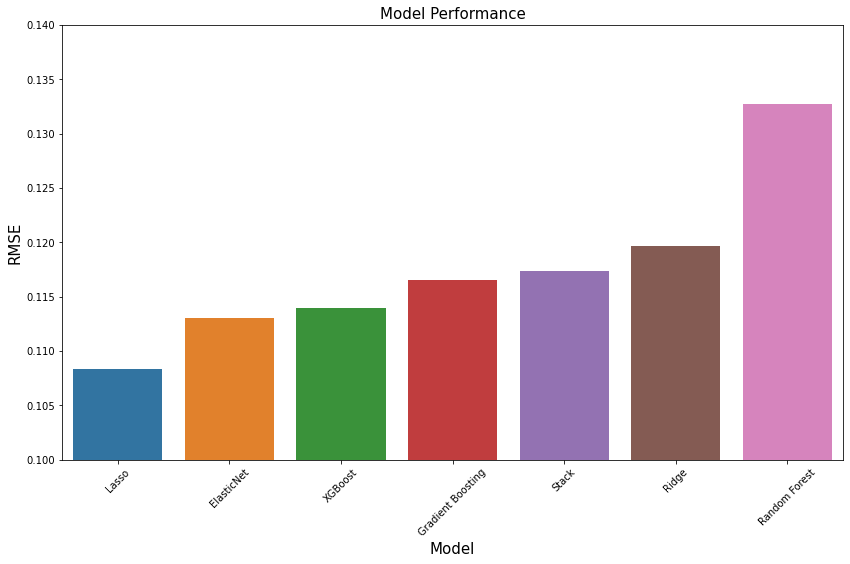

In [182]:
f, ax = plt.subplots(figsize=(14,8))
plt.xticks(rotation='45')
sns.barplot(x=sorted_result['Model'], y=sorted_result['RMSE'])
plt.xlabel('Model', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.ylim(0.10, 0.14)
plt.title('Model Performance', fontsize=15)

#### Prediction

In [239]:
test_data_id = test_data['Id']
lasso_predict = np.exp(lasso_model.predict(model_test_data))
ridge_predict = np.exp(ridge_model.predict(model_test_data))
enet_predict  = np.exp(enet_model.predict(model_test_data))
rf_predict    = np.exp(rf_model.predict(model_test_data))
gb_predict    = np.exp(gb_model.predict(model_test_data))
xgb_predict   = np.exp(xgb_model.predict(model_test_data))
stack_predict = np.exp(stack_reg.predict(model_test_data))

mixed_predict = np.exp((0.30 * np.log(lasso_predict)) + (0.30 * np.log(enet_predict)) + (0.05 * np.log(xgb_predict)) + (0.05 * np.log(gb_predict)) + (0.20 * np.log(stack_predict)) + (0.05 * np.log(ridge_predict.ravel())) + (0.05 * np.log(rf_predict)))

In [202]:
res_lasso = DataFrame(lasso_predict)
res_lasso.columns = ['SalePrice']
result_lasso = pd.concat([test_data_id, res_lasso], axis=1)
result_lasso.to_csv("Submission_Lasso.csv", index=False)

res_ridge = DataFrame(ridge_predict)
res_ridge.columns = ['SalePrice']
result_ridge = pd.concat([test_data_id, res_ridge], axis=1)
result_ridge.to_csv("Submission_Ridge.csv", index=False)

res_enet = DataFrame(enet_predict)
res_enet.columns = ['SalePrice']
result_enet = pd.concat([test_data_id, res_enet], axis=1)
result_enet.to_csv("Submission_ElasticNet.csv", index=False)

res_rf = DataFrame(rf_predict)
res_rf.columns = ['SalePrice']
result_rf = pd.concat([test_data_id, res_rf], axis=1)
result_rf.to_csv("Submission_RandomForestRegressor.csv", index=False)

res_gb = DataFrame(gb_predict)
res_gb.columns = ['SalePrice']
result_gb = pd.concat([test_data_id, res_gb], axis=1)
result_gb.to_csv("Submission_GradientBoostingRegressor.csv", index=False)

res_xgb = DataFrame(xgb_predict)
res_xgb.columns = ['SalePrice']
result_xgb = pd.concat([test_data_id, res_xgb], axis=1)
result_xgb.to_csv("Submission_XGBoostRegressor.csv", index=False)

res_stack = DataFrame(stack_predict)
res_stack.columns = ['SalePrice']
result_stack = pd.concat([test_data_id, res_stack], axis=1)
result_stack.to_csv("Submission_StackingRegressor.csv", index=False)

In [238]:
res_mixed = DataFrame(mixed_predict)
res_mixed.columns = ['SalePrice']
result_mixed = pd.concat([test_data_id, res_mixed], axis=1)
result_mixed.to_csv("Submission_Mixed.csv", index=False)